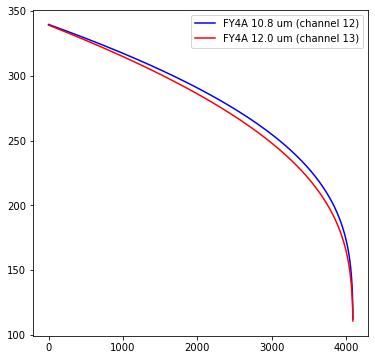

In [59]:
# Convert digital number to TBs.
# Reference : ncc.nesdis.noaa.gov/data/planck.html
import numpy as np
import matplotlib.pyplot as plt

scale_11  = -0.003990
offset_11 = 16.344793
lamda_11  = 10.8

scale_12  = -0.003503
offset_12 = 14.354327
lamda_12  = 12.0

dn = np.arange(4096) # DN is 0 to 4095

# Convert DN to radiance
rad_11 = scale_11 * dn + offset_11
rad_12 = scale_12 * dn + offset_12

# Convert radiance to TBs
#                         c2
# T =  -------------------------------------
#      lamda * ln(c1/lamda^5 * radiance + 1) 

# lamda = wavelength (um)
# c1 = 1.191042 * 10^8 (W/m2-sr-um-4)
# c2 = 1.4387752 * 10^4 (K um)
c1 = 1.191042E08  # W/m2-sr-um
c2 = 1.4387752E04 # K/um

tb_11 = c2 / ( lamda_11 * np.log( 1.+ c1/(rad_11 * lamda_11 **5) ) )
tb_12 = c2 / ( lamda_12 * np.log( 1.+ c1/(rad_12 * lamda_12 **5) ) )

# Plot TBs
fig = plt.figure(figsize=(6,6))
plt.plot(tb_11, 'b', label='FY4A 10.8 um (channel 12)')
plt.plot(tb_12, 'r', label='FY4A 12.0 um (channel 13)')
plt.legend()
#plt.show()
plt.savefig('../plots/brightness_temperature_with_dn.png', dpi=300)